In [27]:
# Stuff that will appear at the top of notebooks;
# You don't have to do anything about it.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())


In [28]:
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]



In [29]:
# Display the chapters of Huckleberry Finn in a table.

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

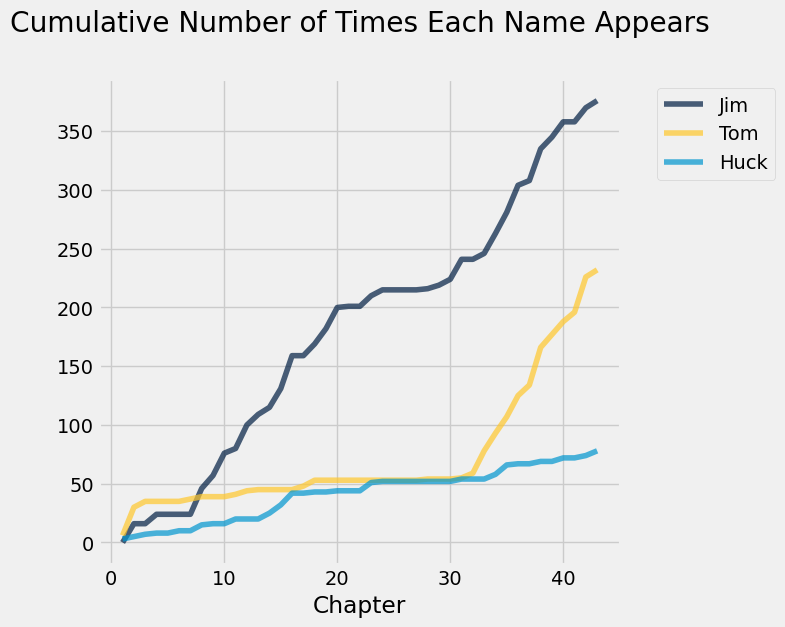

In [30]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom', np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck', np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [31]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])


In [32]:
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [33]:
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

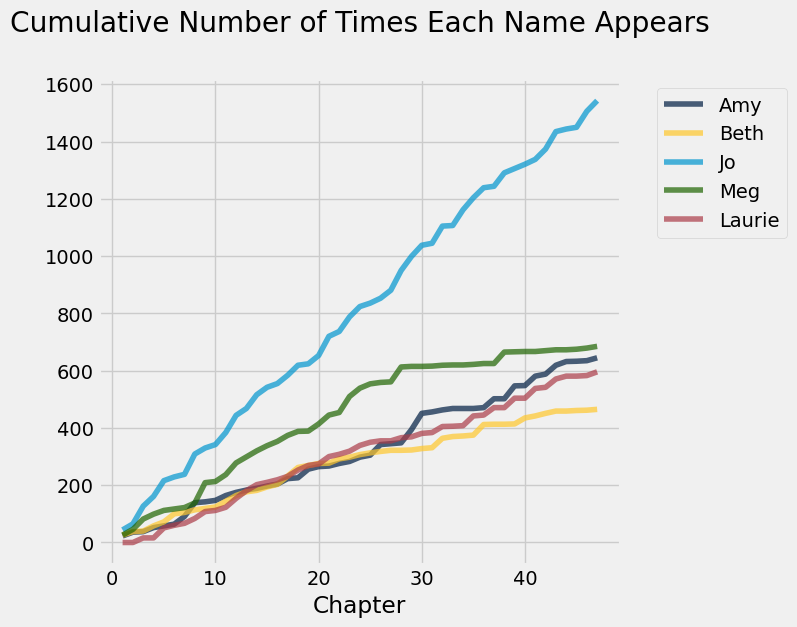

In [34]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth', np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo', np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg', np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'Laurie', np.cumsum(np.char.count(little_women_chapters, 'Laurie')),

    ])

# Plot the cumulative counts.

cum_counts = counts.with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [35]:
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


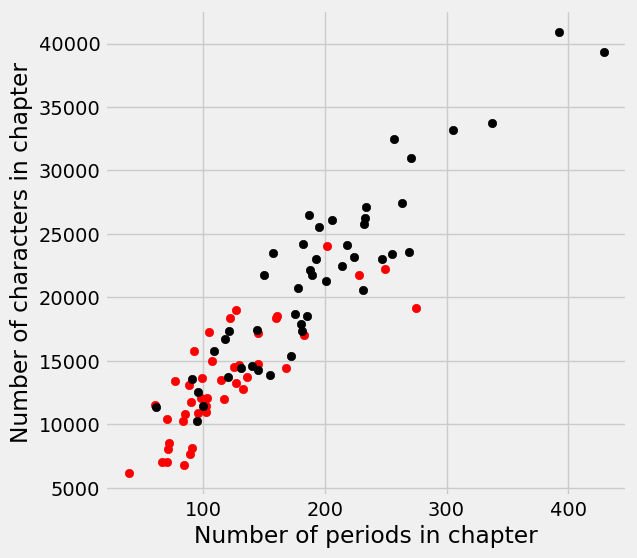

In [36]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='red')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='black')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');